In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
## On minimise une fonction, connue analytiquement
def J(theta):
    return np.sin((theta+1)**2)-theta/10+theta**4/30

$$J(\theta) = \sin\Big((\theta+1)^2\Big) - \frac{\theta}{10} + \frac{\theta^4}{30}$$

Text(0, 0.5, '$J$')

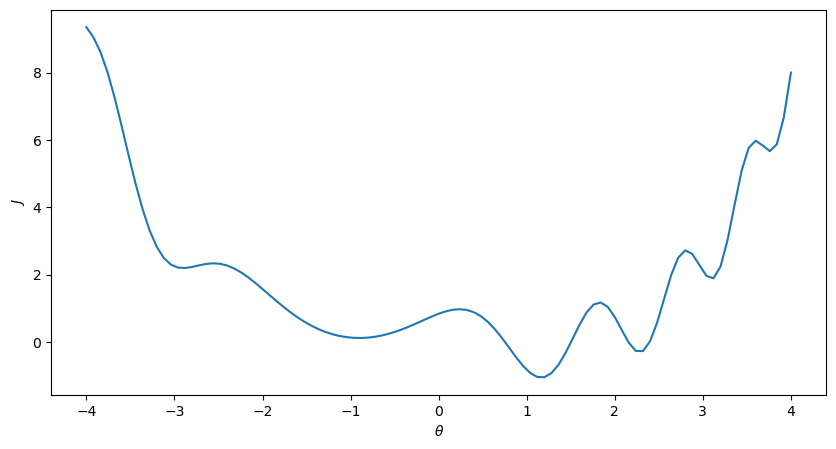

In [7]:
xs = np.linspace(-4,4, 101)
ys = J(xs) 

plt.figure(1,[10,5])
plt.plot(xs,ys)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J$")

In [9]:
xs, J(xs)

(array([-4.  , -3.92, -3.84, -3.76, -3.68, -3.6 , -3.52, -3.44, -3.36,
        -3.28, -3.2 , -3.12, -3.04, -2.96, -2.88, -2.8 , -2.72, -2.64,
        -2.56, -2.48, -2.4 , -2.32, -2.24, -2.16, -2.08, -2.  , -1.92,
        -1.84, -1.76, -1.68, -1.6 , -1.52, -1.44, -1.36, -1.28, -1.2 ,
        -1.12, -1.04, -0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48,
        -0.4 , -0.32, -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,
         0.32,  0.4 ,  0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96,
         1.04,  1.12,  1.2 ,  1.28,  1.36,  1.44,  1.52,  1.6 ,  1.68,
         1.76,  1.84,  1.92,  2.  ,  2.08,  2.16,  2.24,  2.32,  2.4 ,
         2.48,  2.56,  2.64,  2.72,  2.8 ,  2.88,  2.96,  3.04,  3.12,
         3.2 ,  3.28,  3.36,  3.44,  3.52,  3.6 ,  3.68,  3.76,  3.84,
         3.92,  4.  ]),
 array([ 9.34545182,  9.04519257,  8.60944958,  8.01058283,  7.26405844,
         6.41767149,  5.5365645 ,  4.68815228,  3.92995374,  3.30190253,
         2.82338458,  2.49428377,  2.29879382,  2

# Descente de gradient

Implémentez la descente de gradient pour cette fonction. Observez le résultat pour différentsz choix de taux d'apprentissage $\eta$ (`eta`) et différentes positions initiales $\Theta_0$.


Vous pouvez vous référer à ce qui a été vu en `Descente de Gradient - topo.ipynb` pour trouver les étapes. Les grande étapes sont:
- calculez le gradient (la dérivée, ici, car 1 seule variable) de J
- écrivez le code pour la descente de gradient

Remarque: si vous avez des difficultés avec les dérivées mais que vous êtes bon en code, vous pouvez aussi tenter de calculer une dérivée approximative en évaluant `J` en de très nombreux points, et en prenant la pente locale comme une approximation de la dérivée. Votre code sera cependant plus compliqué, moins précis, et en plus, ce n'est typiquement *pas* la stratégie adoptée en Machine Learning (mais bon, c'est une technique de programmation scientifique qui peut être utile ailleurs).

$$J(\theta) = \sin\Big((\theta+1)^2\Big) - \frac{\theta}{10} + \frac{\theta^4}{30}$$

In [12]:
def gradientDeJ(theta):
    return 2*(theta+1)*np.cos((theta+1)**2) - 1/10. + 4/30.*theta**3

In [13]:
gradientDeJ(np.array([3, 4]))

array([-4.16127584, 18.34536145])

In [14]:
eta, theta0, iterMax = 0.01, 1, 20

In [17]:
theta = theta0 #.copy()
theta = theta - eta *gradientDeJ(theta)
theta, theta0

(1.025812411501211, 1)

In [18]:
for i in range(0,10,2): 
    print(i)

0
2
4
6
8


In [19]:
thetas = np.zeros(iterMax)
thetas

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [21]:

def descenteDeGradient(eta, theta0, iterMax):
    theta = theta0 #.copy()
    thetas = np.zeros(iterMax+1)
    thetas[0] = theta
    for epoque in range(iterMax):
        theta = theta - eta*gradientDeJ(theta)
        thetas[epoque+1] = theta
    return thetas

In [22]:
thetas = descenteDeGradient(eta, theta0, iterMax)

In [23]:
J(thetas)

array([-0.82346916, -0.88619249, -0.93441041, -0.97032885, -0.99638417,
       -1.01487636, -1.02777131, -1.03663771, -1.04266681, -1.04673093,
       -1.04945179, -1.05126358, -1.05246496, -1.05325892, -1.05378226,
       -1.0541265 , -1.05435256, -1.05450081, -1.05459794, -1.05466151,
       -1.0547031 ])

In [64]:
thetas

array([4.        , 2.16546385, 2.56423103, 1.64329317, 1.19108684,
       1.13983678, 1.18705014, 1.14380555, 1.18368525, 1.14708753,
       1.18086018, 1.14982341, 1.17847662, 1.15211719, 1.1764587 ,
       1.15404834, 1.17474629, 1.15567913, 1.17329076, 1.15705938,
       1.1720522 ])

In [24]:
eta, theta0, iterMax = 0.1, 4, 20
def descente(eta, theta0, iterMax):
    thetas = descenteDeGradient(eta, theta0, iterMax)
    xs= np.linspace(-4,4, 101)
    ys = J(xs) 

    plt.figure(1,[10,5])
    plt.plot(xs,ys)
    plt.scatter(thetas, J(thetas), marker='x')
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$J$")

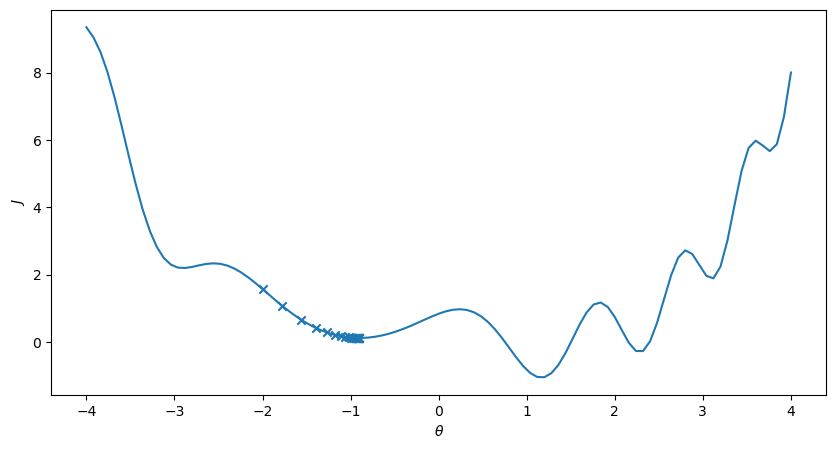

In [25]:
eta, theta0, iterMax = 0.1, -2, 20
descente(eta, theta0, iterMax)

In [63]:
cmap = cm.jet # palettes de couleurs: jet, gist_rainbow, Dark2
colorMaxNumber = iterMax
epoch = 2
gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber))
colorvariable = tuple(gradient[epoch])
colorvariable

(0.0, 0.0, 0.963458110516934, 1.0)